In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

In [2]:
basePath = '../sims.TNG/TNG100-1/output/'

4. Plot the average radial distribution of subhalos around halos of a given mass, i.e. halos with total mass between 10^13 and 10^13.5 solar masses.

In [3]:
fields = ['Group_M_Crit200']

In [4]:
halos = il.groupcat.loadHalos(basePath, 99, fields=fields)

In [5]:
halos[:5]

array([25525.373, 25818.896, 22864.832, 11583.856, 17189.889],
      dtype=float32)

In [6]:
halo_mass = halos * 1e10 / 0.6774

In [7]:
len(halo_mass)

6291349

In [8]:
halo_mass[44]

22983513000000.0

In [9]:
np.min(halo_mass), np.max(halo_mass)

(0.0, 381147000000000.0)

In [10]:
np.count_nonzero(halo_mass)

3423724

In [11]:
count = 0
indices = []
for i in range(len(halo_mass)):
    if halo_mass[i] >= 1e13 and halo_mass[i] <= 10**13.5:
        indices.append(i)
        count += 1

In [12]:
count, indices[:10], len(indices)

(122, [34, 44, 52, 59, 62, 65, 67, 68, 69, 70], 122)

122 halos are within the range $10^{13}$ $M_\odot$ and $10^{13.5}$ $M_\odot$

In [13]:
subhalo = []

In [14]:
for i in range(count):
    subhalo.append(il.groupcat.loadSingle(basePath, 99, haloID=indices[i]))

In [15]:
len(subhalo)

122

In [16]:
mpl.rcParams['agg.path.chunksize'] = 10000 # Required while plotting a large number of points 
mpl.rcParams['path.simplify_threshold'] = 1.0

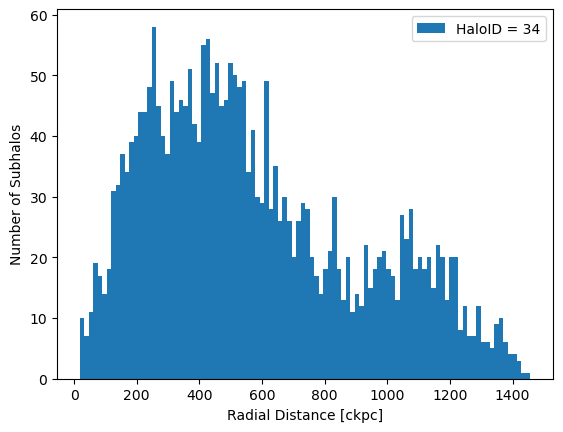

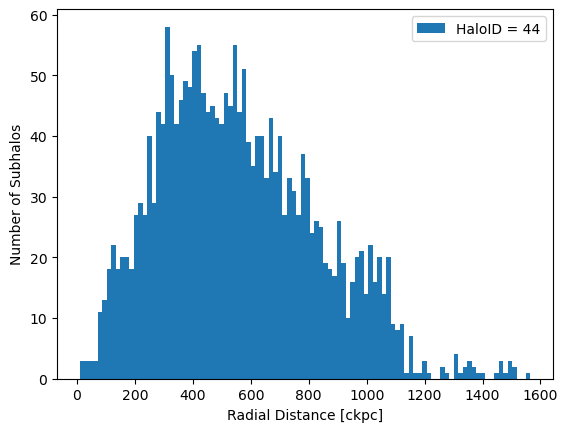

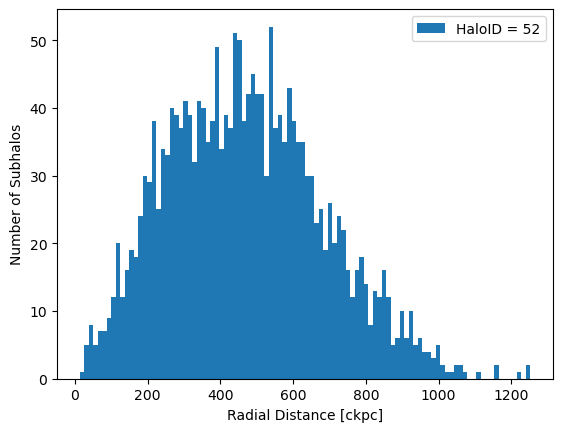

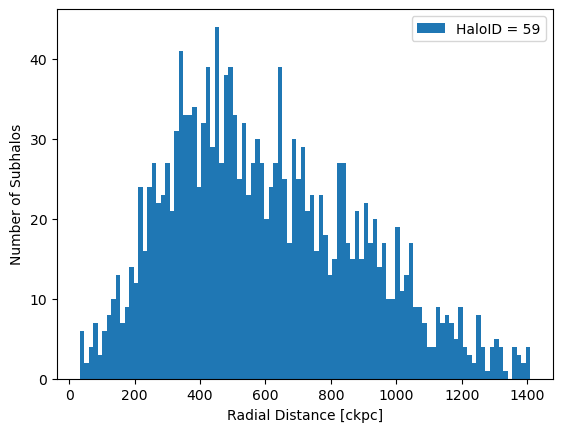

In [17]:
for i in range(10):
    x_cm, y_cm, z_cm = subhalo[i]['GroupCM']
    GroupFirstSub = subhalo[i]['GroupFirstSub']
    GroupNsubs = subhalo[i]['GroupNsubs']
    dist = []
    for j in range(GroupFirstSub, GroupFirstSub+GroupNsubs):
        sub = il.groupcat.loadSingle(basePath, 99, subhaloID=j)
        x = (sub['SubhaloPos'][0])
        y = (sub['SubhaloPos'][1])
        dist.append(math.sqrt(((x - x_cm) ** 2) + ((y - y_cm) ** 2)))
    plt.figure()
    ax = plt.subplot()
    ax.hist(dist, bins=100, label=f'HaloID = {indices[i]}')
    ax.set_xlabel('Radial Distance [ckpc]')
    ax.set_ylabel('Number of Subhalos')
    ax.legend()
plt.show()